In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210820_Titanic/train.tsv", sep="\t", index_col=0) 
test = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210820_Titanic/test.tsv", sep="\t", index_col=0) 
sample_submit = pd.read_csv("/content/drive/My Drive/04_Google Colaboratory/210820_Titanic/sample_submit.tsv", sep="\t", index_col=0 , header=None) 

In [4]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


In [5]:
!pip install --upgrade pandas_profiling

     |████████████████████████████████| 248 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 41.4 MB/s 
     |████████████████████████████████| 102 kB 47.5 MB/s 
     |████████████████████████████████| 636 kB 46.0 MB/s 
     |████████████████████████████████| 62 kB 802 kB/s 
     |████████████████████████████████| 10.1 MB 44.1 MB/s 
     |████████████████████████████████| 675 kB 42.0 MB/s 
     |████████████████████████████████| 812 kB 48.6 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d923aaa613d7828cffeeb37da8022bdec9f310364f674eb001a8a9429d9c0e18
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=f098e57fd9fef47fd310e7453271edcabf5c0de2af255f1e239ed4297755d9d7
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [6]:
!pip install git+https://github.com/pandas-profiling/pandas-profiling.git

  Cloning https://github.com/pandas-profiling/pandas-profiling.git to /tmp/pip-req-build-0r0s7il9
  Running command git clone -q https://github.com/pandas-profiling/pandas-profiling.git /tmp/pip-req-build-0r0s7il9
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
!pip show pandas_profiling

Name: pandas-profiling
Version: 3.0.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: tangled-up-in-unicode, numpy, scipy, pydantic, phik, requests, tqdm, matplotlib, htmlmin, jinja2, seaborn, visions, joblib, missingno, pandas, PyYAML
Required-by: 


In [8]:
import pandas as pd
import warnings
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

warnings.filterwarnings('ignore')

In [9]:
file_name = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
)
df = pd.read_csv(file_name)
profile = ProfileReport(df)

In [10]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas_profiling

In [ ]:
train.profile_report()

In [ ]:
data_all = pd.concat([train, test], sort=False)

In [ ]:
data_all["age"] = data_all["age"].fillna(data_all["age"].mean())
data_all["fare"] = data_all["fare"].fillna(data_all["fare"].mean())
data_all["embarked"] = data_all["embarked"].fillna("S")

In [ ]:
data_all.isnull().sum()

survived    446
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [ ]:
data_all

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
7,0.0,3,male,2.0,3,1,21.0750,S
9,1.0,2,female,14.0,1,0,30.0708,C
11,1.0,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
885,NaN,3,female,39.0,0,5,29.1250,Q
886,NaN,2,male,27.0,0,0,13.0000,S
887,NaN,1,female,19.0,0,0,30.0000,S


In [ ]:
train = data_all.loc[train.index]
test = data_all.loc[test.index]

In [ ]:
cols = ["pclass","sex", "age", "sibsp","parch", "fare", "embarked"]

trainX = pd.get_dummies(train[cols])
testX = pd.get_dummies(test[cols])

y = train["survived"]

In [ ]:
trainX.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
id,,,,,,,,,,
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0
11,1,58.0,0,0,26.5500,1,0,0,0,1


In [ ]:
y.head()

id
3     1.0
4     0.0
7     0.0
9     1.0
11    1.0
Name: survived, dtype: float64

In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler() 
scaler.fit(trainX) 
x = scaler.transform(trainX)
print(x[:10])

t = np_utils.to_categorical(y)
print(t[:10])

[[-1.55641555  0.44793093  0.38020873 -0.50787964  0.3679293   1.36108931
  -1.36108931 -0.46459336 -0.30993405  0.60071313]
 [ 0.84429474  0.44793093 -0.45737981 -0.50787964 -0.49806809 -0.73470565
   0.73470565 -0.46459336 -0.30993405  0.60071313]
 [ 0.84429474 -2.14749707  2.05538581  0.66923723 -0.24768815 -0.73470565
   0.73470565 -0.46459336 -0.30993405  0.60071313]
 [-0.3560604  -1.20370507  0.38020873 -0.50787964 -0.07476165  1.36108931
  -1.36108931  2.15241989 -0.30993405 -1.66468809]
 [-1.55641555  2.2568656  -0.45737981 -0.50787964 -0.14244208  1.36108931
  -1.36108931 -0.46459336 -0.30993405  0.60071313]
 [ 0.84429474  0.76252826  0.38020873  5.37770472 -0.05161328 -0.73470565
   0.73470565 -0.46459336 -0.30993405  0.60071313]
 [ 0.84429474 -2.14749707  2.89297435  0.66923723 -0.09294278 -0.73470565
   0.73470565 -0.46459336  3.2264929  -1.66468809]
 [ 0.84429474  0.03102007 -0.45737981 -0.50787964 -0.51392708  1.36108931
  -1.36108931  2.15241989 -0.30993405 -1.66468809]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

(333, 10)
(112, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(128, input_dim=10)) 
model.add(Activation('relu')) 
model.add(Dense(128)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5))
model.add(Dense(2)) 
model.add(Activation('softmax')) 
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) 

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               1408      
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_27 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 258       
_________________________________________________________________
activation_28 (Activation)   (None, 2)                

In [ ]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8, validation_data=(x_test, t_test))

Epoch 1/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.8709 - val_loss: 0.3960 - val_accuracy: 0.8571
Epoch 2/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8408 - val_loss: 0.4030 - val_accuracy: 0.7857
Epoch 3/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.8559 - val_loss: 0.3961 - val_accuracy: 0.8571
Epoch 4/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8649 - val_loss: 0.3922 - val_accuracy: 0.8571
Epoch 5/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8408 - val_loss: 0.3946 - val_accuracy: 0.8571
Epoch 6/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8589 - val_loss: 0.3974 - val_accuracy: 0.8393
Epoch 7/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8498 - val_loss: 0.3885 - val_accuracy: 0.8571
Epoch 8/30
42/42 [==

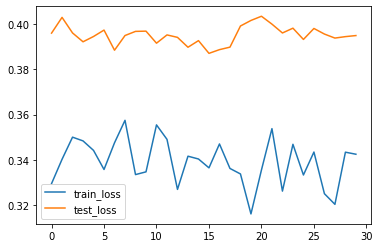

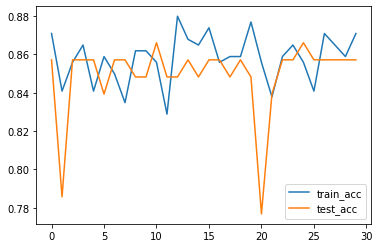

In [ ]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label="train_loss")
plt.plot(np.arange(len(test_loss)), test_loss, label="test_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="train_acc")
plt.plot(np.arange(len(train_acc)), test_acc, label="test_acc")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8571
0.3949623703956604 0.8571428656578064


In [ ]:
pred = model.predict(testX)[:, 1]

In [ ]:
sample_submit[1] = pred
sample_submit.to_csv('submit2.tsv', header=None, sep='\t')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
